# EDA 탐색적 분석

In [106]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
#한글 폰트 호출
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
rc('font', family=font_name)

In [108]:
#csv 파일 호출
df = pd.read_excel('./data/seoul_2014to2018_cctv_pop_crime2.xlsx')
df.head(3)
df.info()

,년도,자치구,CCTV 수,세대,인구 합계,한국인,등록외국인,범죄 합계,살인,강도,강간강제추행,절도,폭력
0,2014.0,강남구,430,234324,576868,571509,5359,8851,13,37,512,3895,4394
1,NaN,강동구,59,186239,484191,479586,4605,5392,5,10,148,2425,2804
2,NaN,강북구,74,141139,339671,336363,3308,4030,6,21,189,1494,2320


In [110]:
#결측치 처리
df['년도'].fillna(method='ffill' ,inplace=True)

#'년도'컬럼 형변환 - float->int->str
df['년도'] = df['년도'].astype(int)
#피벗테이블로 변환
df = df.pivot_table(index=['자치구','년도'])
#print(df)
#지역별 리스트 생성, 중복제거, 총 25개의 구로 나뉨
seoul_area = []
for i,j in df.index:
    seoul_area.append(i)
seoul_area = list(set(seoul_area))
#print(len(seoul_area))
#print(seoul_area)

#조회
# for i in seoul_area:
#     print(i)
#     print(df.loc[(i)])

In [114]:
#자치구 별로 csv파일로 추출
for i in seoul_area:
    df.loc[(i)].to_csv('./seoul/'+i+'.csv',encoding='cp949')

## 1.강남구 분석

In [177]:
gdf = pd.read_csv('./seoul/강남구.csv', encoding='cp949',index_col='년도')
idf = pd.read_csv('./seoul/강남구.csv', encoding='cp949')

gdf

,CCTV 수,강간강제추행,강도,등록외국인,범죄 합계,살인,세대,인구 합계,절도,폭력,한국인
년도,,,,,,,,,,,
2014,430,512,37,5359,8851,13,234324,576868,3895,4394,571509
2015,976,449,21,5325,8617,13,237556,582206,3850,4284,576881
2016,1741,516,39,5084,8149,5,235329,575597,3587,4002,570512
2017,2318,607,20,4929,7720,7,233311,566427,3130,3956,561497
2018,2766,600,14,4978,7513,10,229509,551615,3004,3885,546637


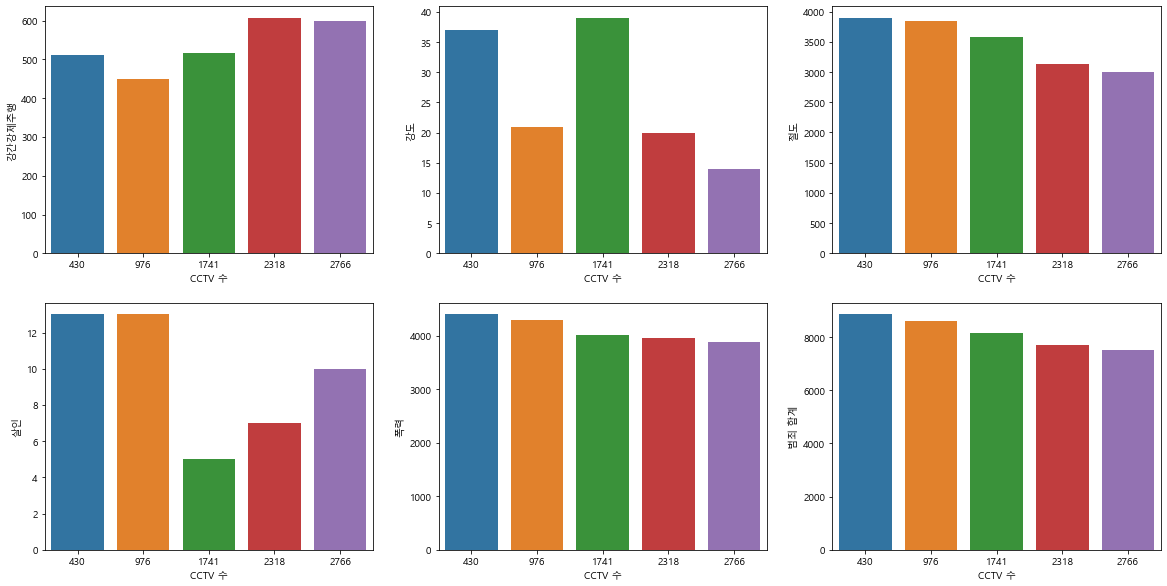

In [164]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)


sns.barplot(x='CCTV 수', y='강간강제추행', data=gdf, ax= ax1)
sns.barplot(x='CCTV 수', y='강도', data=gdf, ax= ax2)
sns.barplot(x='CCTV 수', y='절도', data=gdf, ax= ax3)
sns.barplot(x='CCTV 수', y='살인', data=gdf, ax= ax4)
sns.barplot(x='CCTV 수', y='폭력', data=gdf, ax= ax5)
sns.barplot(x='CCTV 수', y='범죄 합계', data=gdf, ax= ax6)

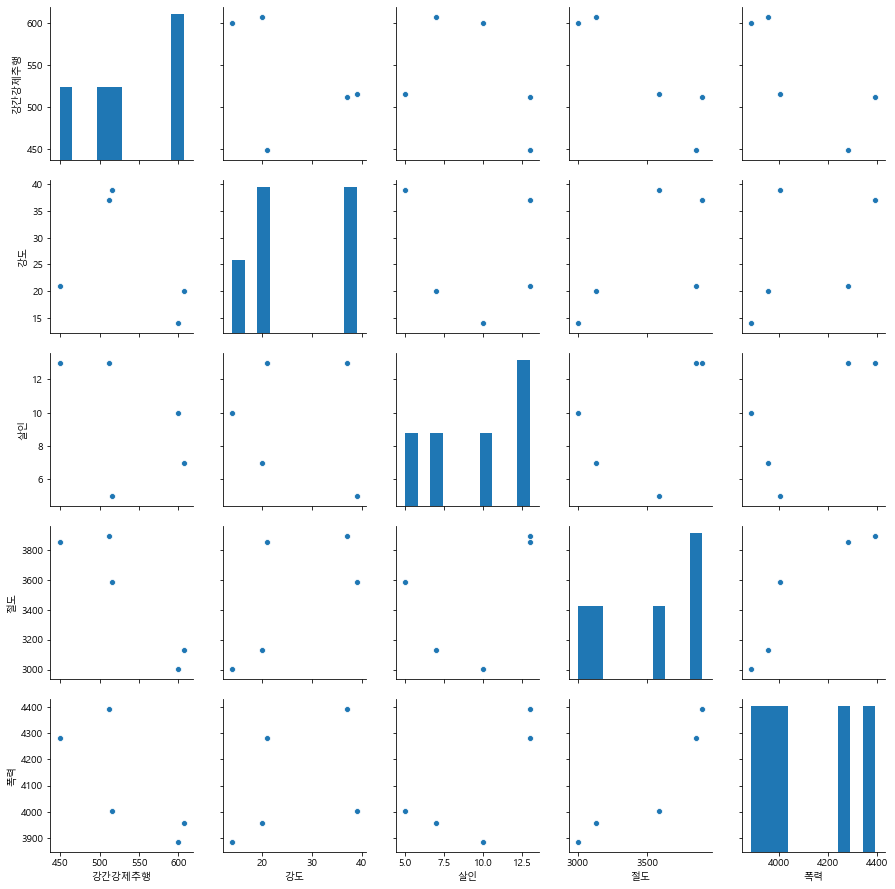

In [165]:
crime_kind = gdf[['강간강제추행', '강도', '살인', '절도', '폭력']]
g = sns.pairplot(crime_kind)

In [172]:
gdf[['CCTV 수', '강간강제추행', '강도', '등록외국인', '살인', '세대', '절도','폭력', '한국인']].corr()

,CCTV 수,강간강제추행,강도,등록외국인,살인,세대,절도,폭력,한국인
CCTV 수,1.000000,0.807700,-0.618627,-0.953665,-0.596684,-0.719559,-0.967912,-0.977628,-0.845481
강간강제추행,0.807700,1.000000,-0.434066,-0.867657,-0.467103,-0.862618,-0.916514,-0.764748,-0.864306
강도,-0.618627,-0.434066,1.000000,0.452039,-0.179687,0.463093,0.654434,0.454010,0.615664
등록외국인,-0.953665,-0.867657,0.452039,1.000000,0.748456,0.652282,0.943255,0.966045,0.751476
살인,-0.596684,-0.467103,-0.179687,0.748456,1.000000,0.166717,0.494974,0.744917,0.229407
세대,-0.719559,-0.862618,0.463093,0.652282,0.166717,1.000000,0.818879,0.640227,0.970951
절도,-0.967912,-0.916514,0.654434,0.943255,0.494974,0.818879,1.000000,0.915390,0.908774
폭력,-0.977628,-0.764748,0.454010,0.966045,0.744917,0.640227,0.915390,1.000000,0.760714
한국인,-0.845481,-0.864306,0.615664,0.751476,0.229407,0.970951,0.908774,0.760714,1.000000
